# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [20]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [25]:
# Try loading one file
df = pd.read_parquet('/Users/ankit/Downloads/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [31]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')

In [33]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/ankit/Downloads/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # Convert picup datetime to extract date and hour
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for current_date in data['pickup_date'].unique():
            date_data = data[data['pickup_date'] == current_date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac = 0.007, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [35]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('/Users/ankit/Downloads/EDA_Optimising_NYC_Taxis_AnkitRanjan.csv',index = False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [38]:
# Load the new data file
df = pd.read_csv('/Users/ankit/Downloads/EDA_Optimising_NYC_Taxis_AnkitRanjan.csv')

In [39]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN                NaN           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN                NaN           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.66           0.0   
1             0  ...      0.5        3.00           0.0   
2             1  ...      0.5        3.14           0.0   
3             0  ...      0.5        0.00           0.0   
4             1  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

   pickup_date  pickup_hour airport_fee  
0   2023-12-01            0         NaN  
1   2023-12-01            0         NaN  
2   2023-12-01            0         NaN  
3   2023-12-01            0         NaN  
4   2023-12-01            0         NaN  

[5 rows x 22 columns]

In [40]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285973 entries, 0 to 285972
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               285973 non-null  int64  
 1   tpep_pickup_datetime   285973 non-null  object 
 2   tpep_dropoff_datetime  285973 non-null  object 
 3   passenger_count        276407 non-null  float64
 4   trip_distance          285973 non-null  float64
 5   RatecodeID             276407 non-null  float64
 6   store_and_fwd_flag     276407 non-null  object 
 7   PULocationID           285973 non-null  int64  
 8   DOLocationID           285973 non-null  int64  
 9   payment_type           285973 non-null  int64  
 10  fare_amount            285973 non-null  float64
 11  extra                  285973 non-null  float64
 12  mta_tax                285973 non-null  float64
 13  tip_amount             285973 non-null  float64
 14  tolls_amount           285973 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [43]:
# Fix the index and drop any columns that are not needed
# - 'pickup_date' and 'pickup_hour' are likely derived from tpep_pickup_datetime'
columns_to_drop = ['pickup_date', 'pickup_hour']
df_cleaned = df.drop(columns = columns_to_drop)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [45]:
# Combine the two airport fee columns
df['airport_fee_combined'] = df['Airport_fee'].combine_first(df['airport_fee'])

# Drop the original columns after merging
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

# Rename the combined column to 'airport_fee'
df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285973 entries, 0 to 285972
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               285973 non-null  int64  
 1   tpep_pickup_datetime   285973 non-null  object 
 2   tpep_dropoff_datetime  285973 non-null  object 
 3   passenger_count        276407 non-null  float64
 4   trip_distance          285973 non-null  float64
 5   RatecodeID             276407 non-null  float64
 6   store_and_fwd_flag     276407 non-null  object 
 7   PULocationID           285973 non-null  int64  
 8   DOLocationID           285973 non-null  int64  
 9   payment_type           285973 non-null  int64  
 10  fare_amount            285973 non-null  float64
 11  extra                  285973 non-null  float64
 12  mta_tax                285973 non-null  float64
 13  tip_amount             285973 non-null  float64
 14  tolls_amount           285973 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]

# View fare_amount and RatecodeID to analyze
print(negative_fares[['fare_amount', 'RatecodeID']])

Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [49]:
# Analyse RatecodeID for the negative fare amounts
print("No negative fare_amount values found, so no RatecodeID anomalies to analyze.")
#  Ensure correct airport fee column name
df.rename(columns={"airport_fee_combined": "airport_fee"}, inplace=True)


No negative fare_amount values found, so no RatecodeID anomalies to analyze.


In [50]:
# Find which columns have negative values
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

# Count how many negative values exist in each of these
negative_counts_before = df[monetary_columns].lt(0).sum()
print("Negative values before cleaning:\n", negative_counts_before)

Negative values before cleaning:
 fare_amount               0
extra                     1
mta_tax                  11
tip_amount                0
tolls_amount              0
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
airport_fee               2
dtype: int64


In [51]:
# fix these negative values
df[monetary_columns] = df[monetary_columns].clip(lower=0)

# Confirm all negative values are fixed
negative_counts_after = df[monetary_columns].lt(0).sum()
print("\n Negative values AFTER cleaning:\n", negative_counts_after)


 Negative values AFTER cleaning:
 fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [54]:
# Find the proportion of missing values in each column

missing_proportions = df.isna().mean().sort_values(ascending=False) * 100


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
missing_passenger_rows = df[df['passenger_count'].isna()]

# Impute NaN values in 'passenger_count'
passenger_mode = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(passenger_mode, inplace=True)

# Confirm that passenger_count has no more missing values
missing_passenger_after = df['passenger_count'].isna().sum()

missing_proportions, missing_passenger_rows[['passenger_count']], missing_passenger_after

(airport_fee              3.345071
 passenger_count          3.345071
 RatecodeID               3.345071
 store_and_fwd_flag       3.345071
 congestion_surcharge     3.345071
 mta_tax                  0.000000
 pickup_hour              0.000000
 pickup_date              0.000000
 total_amount             0.000000
 improvement_surcharge    0.000000
 tolls_amount             0.000000
 tip_amount               0.000000
 VendorID                 0.000000
 extra                    0.000000
 tpep_pickup_datetime     0.000000
 payment_type             0.000000
 DOLocationID             0.000000
 PULocationID             0.000000
 trip_distance            0.000000
 tpep_dropoff_datetime    0.000000
 fare_amount              0.000000
 dtype: float64,
         passenger_count
 1                   NaN
 3                   NaN
 27                  NaN
 45                  NaN
 47                  NaN
 ...                 ...
 285698              NaN
 285727              NaN
 285778              Na

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [59]:
# Fix missing values in 'RatecodeID'
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)

# Confirm that there are no missing values left in 'RatecodeID'
missing_ratecode_after = df['RatecodeID'].isna().sum()
missing_ratecode_after

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [61]:
# Check distribution of existing (non-null) congestion_surcharge values
congestion_summary = df['congestion_surcharge'].describe()

# handle null values in congestion_surcharge
congestion_median = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(congestion_median, inplace=True)

# Confirm no missing values remain
missing_congestion_after = df['congestion_surcharge'].isna().sum()
congestion_summary, missing_congestion_after


(count    276407.000000
 mean          2.301579
 std           0.675784
 min           0.000000
 25%           2.500000
 50%           2.500000
 75%           2.500000
 max           2.500000
 Name: congestion_surcharge, dtype: float64,
 0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
# Handle any remaining missing values
remaining_nulls = df.isna().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]

# Fill 'store_and_fwd_flag' missing values with the mode ('N' is most common)
if 'store_and_fwd_flag' in remaining_nulls:
    flag_mode = df['store_and_fwd_flag'].mode()[0]
    df['store_and_fwd_flag'].fillna(flag_mode, inplace=True)

# Fill 'airport_fee' missing values with 0 assuming no fee for most trips
if 'airport_fee' in remaining_nulls:
    df['airport_fee'].fillna(0, inplace=True)

# Confirm all missing values handled
final_missing = df.isna().sum().sum()
final_missing


0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [66]:
# Describe the data and check if there are any potential outliers present
summary_stats = df.describe

# Identify numeric columns to check for unusual values
numeric_cols = df.select_dtypes(include='number').columns

# Detect outliers using 1.5 * IQR rule
outlier_flags = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# Step 5: Display number of outliers per column
print("\n Potential Outliers Detected:")
for col, count in outlier_flags.items():
    print(f"{col}: {count}")


 Potential Outliers Detected:
VendorID: 64
passenger_count: 68711
trip_distance: 37715
RatecodeID: 15764
PULocationID: 0
DOLocationID: 0
payment_type: 60817
fare_amount: 28656
extra: 4814
mta_tax: 2661
tip_amount: 22021
tolls_amount: 23272
improvement_surcharge: 321
total_amount: 33501
congestion_surcharge: 21938
pickup_hour: 0
airport_fee: 25567


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [70]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [71]:
# Continue with outlier handling
# We'll focus on major numeric fields where outliers matter
columns_to_treat = [
    'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
    'total_amount', 'congestion_surcharge', 'airport_fee'
]

# Apply IQR capping (winsorization) for each column
for col in columns_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)


In [72]:
# Do any columns need standardising?

# We'll consider numeric columns with large std deviations relative to mean
std_summary = df.describe().T[['mean', 'std']]
std_summary['std_to_mean_ratio'] = std_summary['std'] / std_summary['mean']
std_summary.sort_values(by='std_to_mean_ratio', ascending=False, inplace=True)

std_summary

mean        std  std_to_mean_ratio
RatecodeID               1.632564   7.389193           4.526128
extra                    1.601063   1.812549           1.132091
tip_amount               3.197666   2.797603           0.874889
trip_distance            2.661617   2.199454           0.826360
passenger_count          1.357421   0.877142           0.646183
fare_amount             17.759130  11.399347           0.641887
total_amount            25.765899  13.300870           0.516220
payment_type             1.165494   0.509341           0.437017
DOLocationID           163.583995  69.940167           0.427549
pickup_hour             14.888872   6.032510           0.405169
PULocationID           164.402734  63.992808           0.389244
VendorID                 1.735082   0.446333           0.257240
mta_tax                  0.495377   0.047932           0.096759
improvement_surcharge    0.999079   0.027915           0.027941
congestion_surcharge     2.500000   0.000000           0.000000
tolls_amount             0.000000   0.000000                NaN
airport_fee              0.000000   0.000000                NaN

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [74]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`:Categorical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:Numerical
* `extra`:Numerical
* `mta_tax`:Numerical
* `tip_amount`:Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Numerical
* `total_amount`:Numerical
* `congestion_surcharge`:Numerical
* `airport_fee`:Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

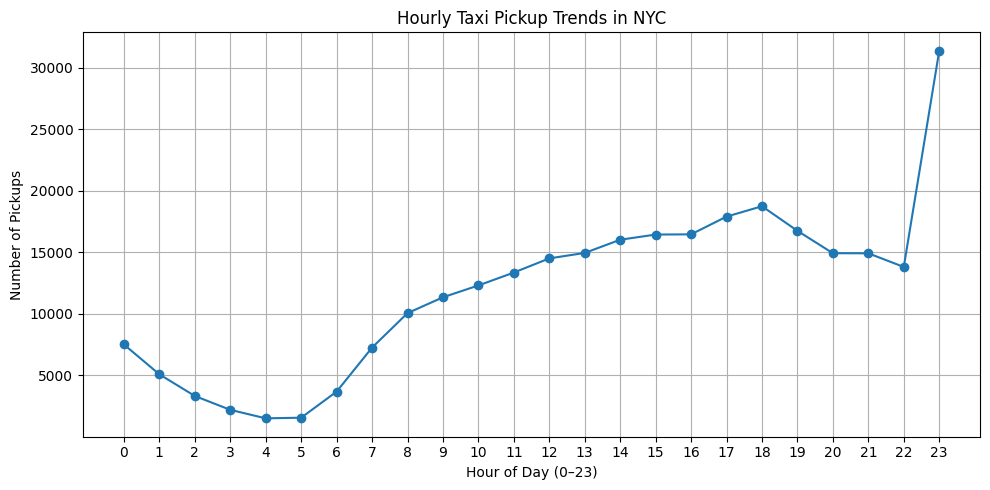

In [79]:
# Find and show the hourly trends in taxi pickups
# Group by pickup_hour and count number of trips
hourly_trends = df.groupby('pickup_hour').size()

# Plot the hourly pickup trends
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o')
plt.title("Hourly Taxi Pickup Trends in NYC")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


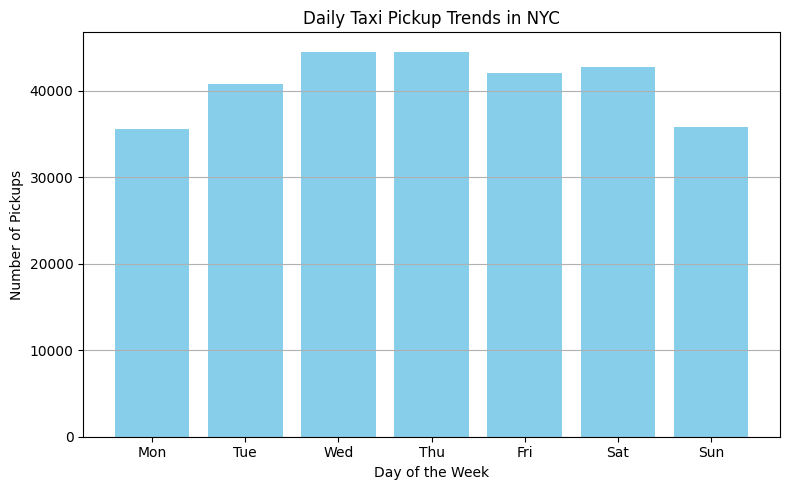

In [80]:
# Find and show the daily trends in taxi pickups (days of the week)
# Convert pickup datetime to datetime type if needed
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of the week (0 = Monday, 6 = Sunday)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map day numbers to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_day_name'] = df['pickup_dayofweek'].map(day_map)

# Count pickups by day
daily_trends = df['pickup_day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot
plt.figure(figsize=(8, 5))
plt.bar(daily_trends.index, daily_trends.values, color='skyblue')
plt.title("Daily Taxi Pickup Trends in NYC")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


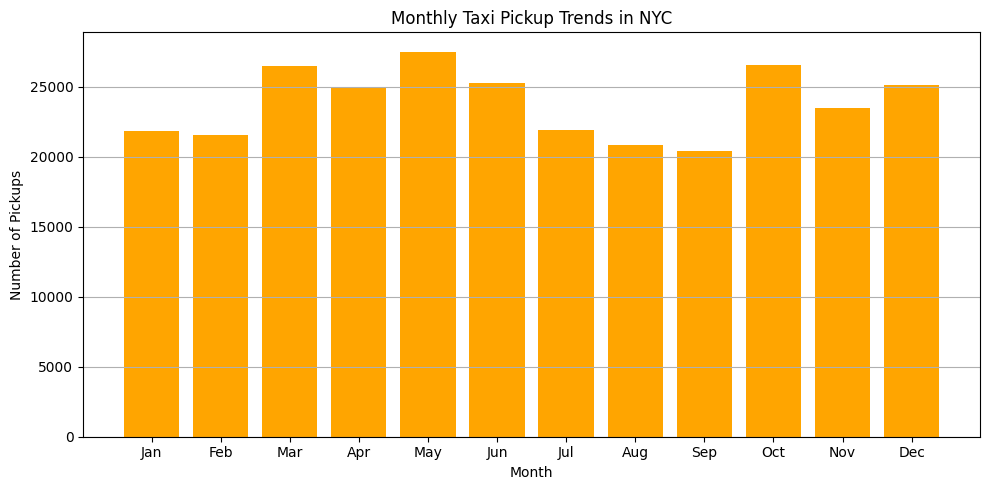

In [81]:
# Show the monthly trends in pickups
# Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Count pickups per month
monthly_trends = df['pickup_month'].value_counts().sort_index()

# Map month numbers to names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_trends.index = monthly_trends.index.map(month_map)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values, color='orange')
plt.title("Monthly Taxi Pickup Trends in NYC")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [84]:
# Analyse the above parameters
# Select the relevant financial and distance columns
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Analyze for zero or negative values in each
financial_analysis = pd.DataFrame(columns=['Column', 'Zero Values', 'Negative Values'])

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    financial_analysis = pd.concat([
        financial_analysis,
        pd.DataFrame([[col, zero_count, negative_count]], columns=['Column', 'Zero Values', 'Negative Values'])
    ])

financial_analysis.reset_index(drop=True, inplace=True)
financial_analysis


Column Zero Values Negative Values
0    fare_amount          92               0
1     tip_amount       65923               0
2   total_amount          43               0
3  trip_distance        5667               0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [87]:
# Create a df with non zero entries for the selected parameters.
# Step 1: Create a copy of the DataFrame
df_nonzero = df.copy()

# Step 2: Filter out rows where any of the key financial columns are zero
# We'll keep trip_distance = 0 ONLY if needed for specific use cases, but default here is to exclude it
filtered_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in filtered_cols:
    df_nonzero = df_nonzero[df_nonzero[col] > 0]

# Step 3: Check final shape and optionally preview
df_nonzero_shape = df_nonzero.shape
df_nonzero_shape


(218646, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

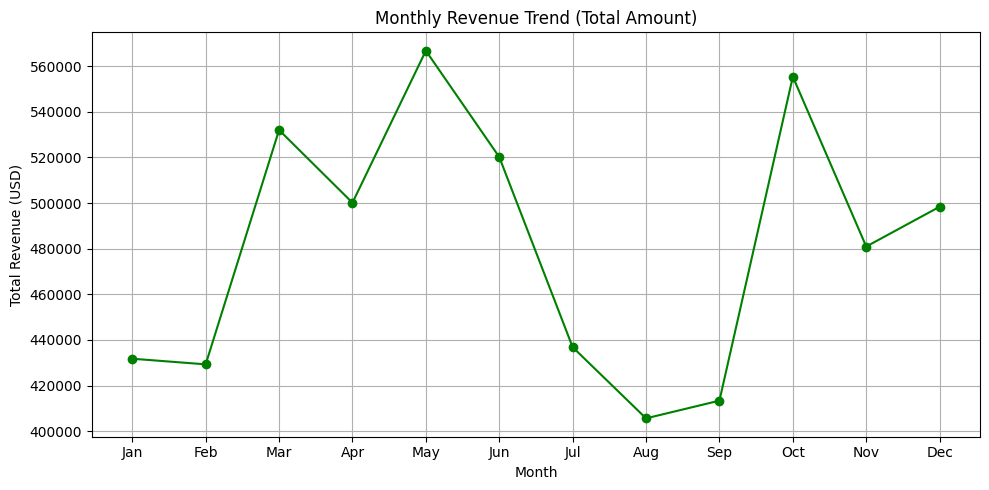

In [89]:
# Group data by month and analyse monthly revenue
# Group the non-zero filtered data by pickup month and sum the total_amount
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum().sort_index()

# Map month numbers to names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_revenue.index = monthly_revenue.index.map(month_map)

# Plot the revenue trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='green')
plt.title("Monthly Revenue Trend (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

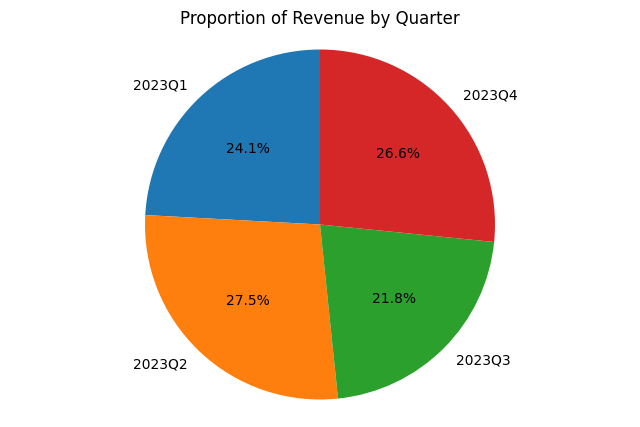

pickup_quarter
2023Q1    24.14
2023Q2    27.50
2023Q3    21.76
2023Q4    26.60
Freq: Q-DEC, Name: total_amount, dtype: float64

In [91]:
# Calculate proportion of each quarter
# Step 1: Create a 'quarter' column from pickup datetime
df_nonzero['pickup_quarter'] = df_nonzero['tpep_pickup_datetime'].dt.to_period("Q")

# Step 2: Calculate total revenue per quarter
quarterly_revenue = df_nonzero.groupby('pickup_quarter')['total_amount'].sum()

# Step 3: Calculate proportion of each quarter
revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.pie(revenue_proportion, labels=revenue_proportion.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Revenue by Quarter")
plt.axis('equal')
plt.show()

revenue_proportion.round(2)


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

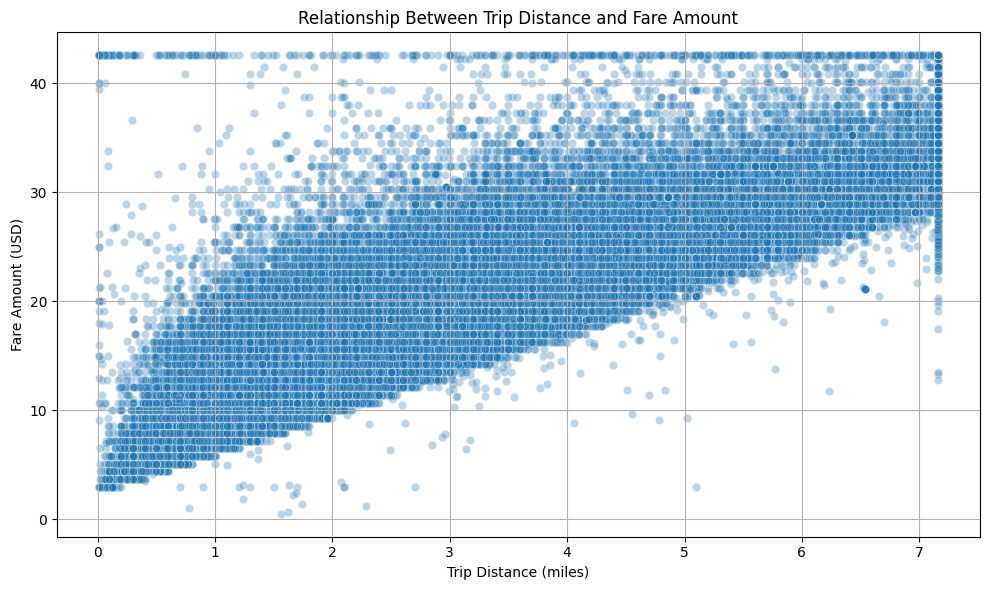

0.9514093741924493

In [93]:
# Show how trip fare is affected by distance
# Filter out zero distance trips for clean visualization
df_distance_fare = df_nonzero[df_nonzero['trip_distance'] > 0]

# Plot the relationship using a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_distance_fare, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_distance_fare['trip_distance'].corr(df_distance_fare['fare_amount'])
correlation


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

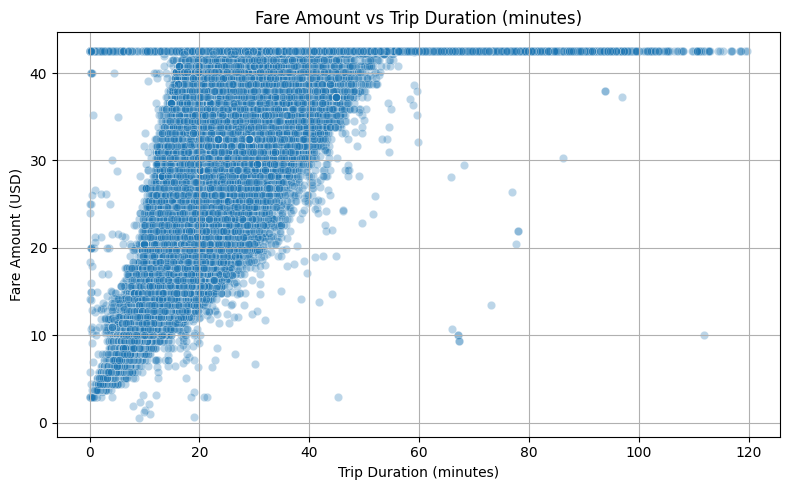

In [95]:
# Step 1: Ensure datetime columns are in datetime format
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'])

# Step 2: Create trip_duration_minutes column
df_nonzero['trip_duration_minutes'] = (
    df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']
).dt.total_seconds() / 60

# Step 3: Filter for valid trips (1 to 120 minutes)
df_valid = df_nonzero[(df_nonzero['trip_duration_minutes'] > 0) & (df_nonzero['trip_duration_minutes'] <= 120)]


# Show relationship between fare and trip duration
df_valid = df_nonzero[(df_nonzero['trip_duration_minutes'] > 0) & (df_nonzero['trip_duration_minutes'] <= 120)]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='trip_duration_minutes', y='fare_amount', alpha=0.3)
plt.title("Fare Amount vs Trip Duration (minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

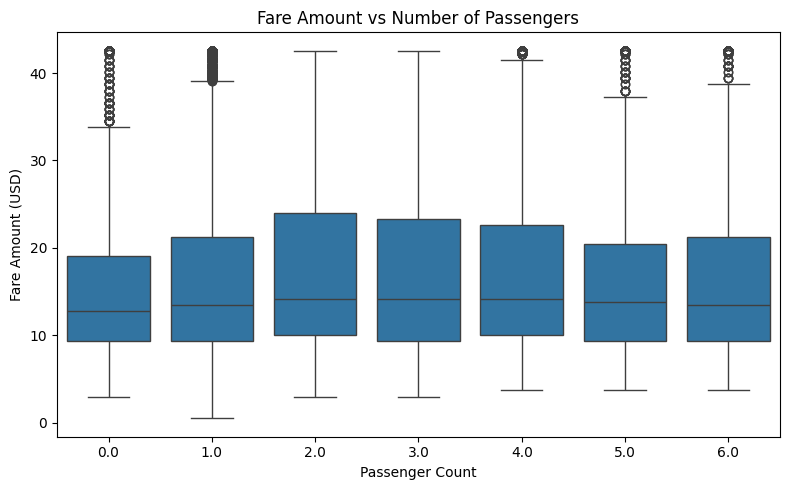

0.024920459735753773

In [96]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='passenger_count', y='fare_amount')
plt.title("Fare Amount vs Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount (USD)")
plt.tight_layout()
plt.show()

# Calculate correlation
fare_passenger_corr = df_valid['fare_amount'].corr(df_valid['passenger_count'])
fare_passenger_corr

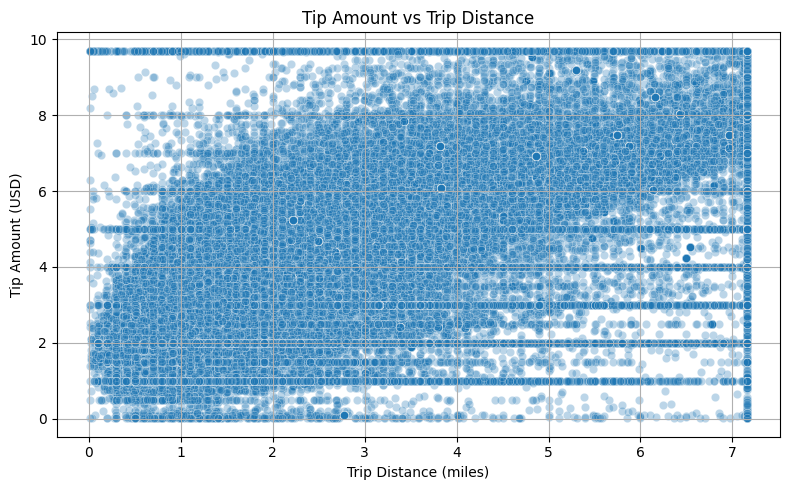

0.8058175492662043

In [97]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between tip and trip distance
tip_distance_corr = df_valid['tip_amount'].corr(df_valid['trip_distance'])
tip_distance_corr


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

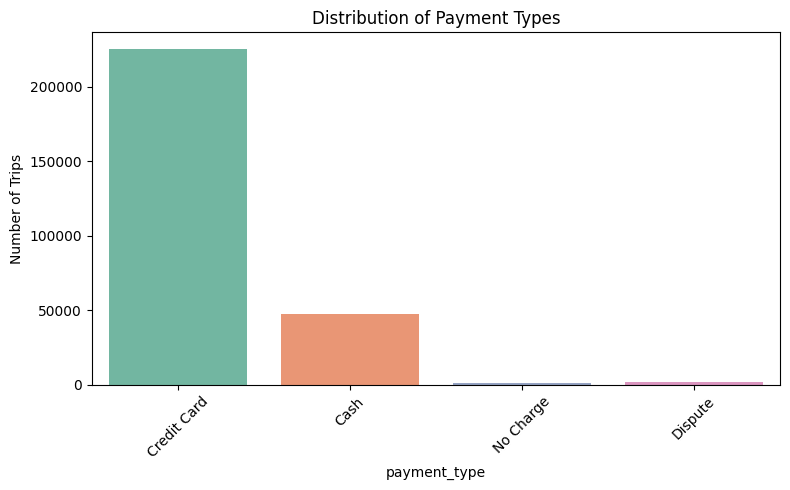

payment_type
NaN              9566
Credit Card    225151
Cash            47750
No Charge        1361
Dispute          2140
Name: count, dtype: int64

In [99]:
# Analyse the distribution of different payment types (payment_type).
# Count of each payment_type
payment_counts = df['payment_type'].value_counts().sort_index()

# Map payment_type codes to labels based on TLC dictionary
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")
plt.title("Distribution of Payment Types")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_counts


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [104]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [106]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/ankit/Downloads/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


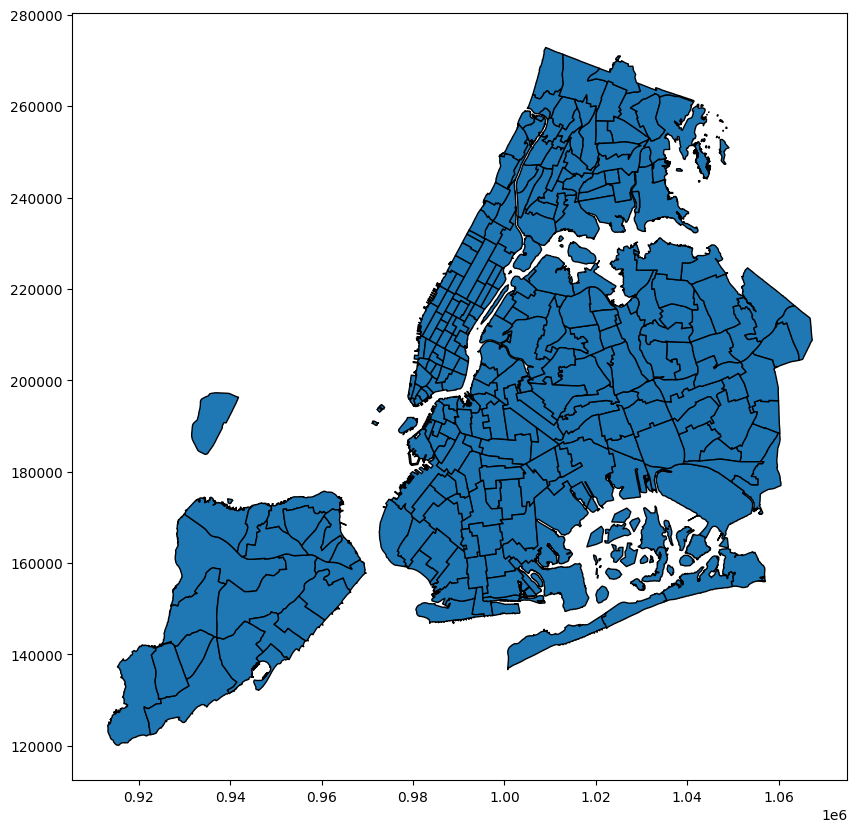

In [108]:
# print(zones.info())
print(zones.info())
# zones.plot()
zones.plot(figsize=(10, 10), edgecolor='black')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [111]:
# Load the trip data
trips = pd.read_parquet("/Users/ankit/Downloads/EDA_Optimising_NYC_Taxis_AnkitRanjan.parquet")

# Merge zones and trip records using locationID and PULocationID
merged = trips.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

# View the merged result
print(merged.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  pickup_date  pickup_hour  airport_fee  OBJECTID  \
0

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [113]:
# Group data by location and calculate the number of trips
# 1. Count trips per zone
trip_counts = merged.groupby("zone").size().reset_index(name="num_trips")

# 2. Identify the five busiest zones
top_zones = trip_counts.sort_values(by="num_trips", ascending=False).head(5)
top_zones


zone  num_trips
111            JFK Airport      15536
142         Midtown Center      12973
212  Upper East Side South      12961
211  Upper East Side North      11459
120      LaGuardia Airport      10106

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [115]:
# Merge trip counts back to the zones GeoDataFrame
# Group by pickup zone name and count number of trips
trip_counts = merged.groupby('zone').size().reset_index(name='num_trips')

# View the result
trip_counts.head()


zone  num_trips
0  Allerton/Pelham Gardens          9
1            Alphabet City        343
2            Arden Heights          1
3  Arrochar/Fort Wadsworth          3
4                  Astoria        161

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

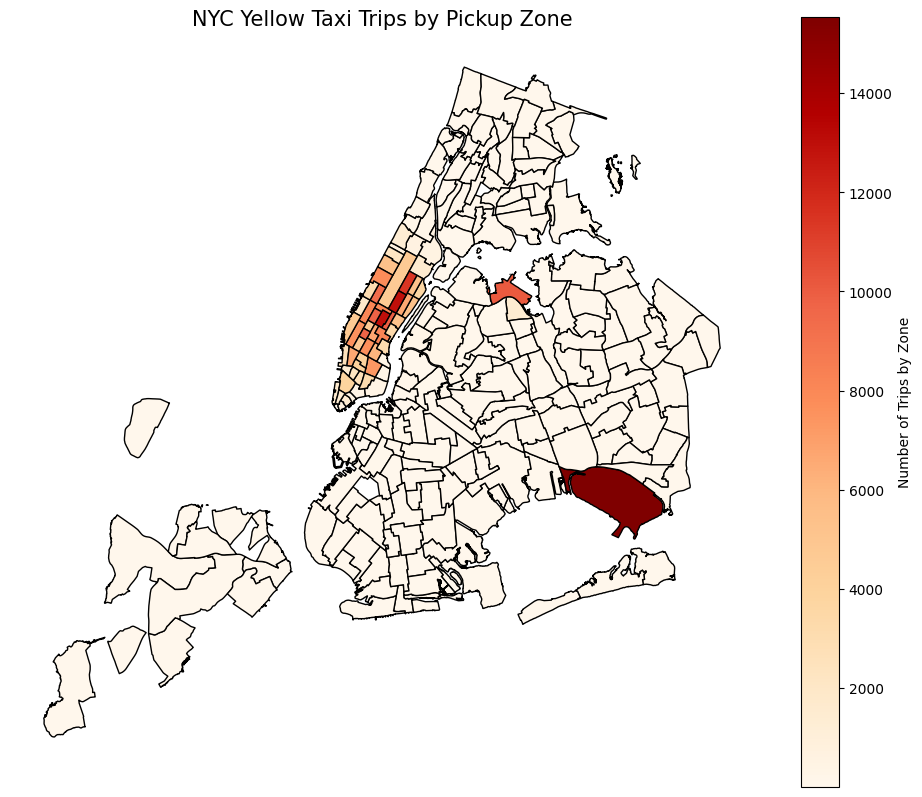

In [119]:
# Merge the trip_counts into zones to prepare for choropleth
zones_trips = zones.merge(trip_counts, on='zone', how='left')

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Trips by Zone", 'orientation': "vertical"},
    cmap='OrRd',  # Optional: better color palette for heatmap
    edgecolor='black'
)

plt.axis('off')
plt.title("NYC Yellow Taxi Trips by Pickup Zone", fontsize=15)
plt.show()


In [120]:
# can you try displaying the zones DF sorted by the number of trips?
zones_trips_sorted = zones_trips.sort_values(by='num_trips', ascending=False)

# View top zones
zones_trips_sorted[['zone', 'borough', 'num_trips']].head()



zone    borough  num_trips
131            JFK Airport     Queens    15536.0
160         Midtown Center  Manhattan    12973.0
236  Upper East Side South  Manhattan    12961.0
235  Upper East Side North  Manhattan    11459.0
137      LaGuardia Airport     Queens    10106.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [129]:
# Find routes which have the slowest speeds at different times of the day
# Extract hour from pickup timestamp
merged['pickup_hour'] = merged['tpep_pickup_datetime'].dt.hour

# Define route: PU Zone → DO Zone
merged['route'] = merged['zone'] + " → " + merged['DOLocationID'].astype(str)

# 2. Compute trip duration in hours
merged['duration_hours'] = (
    pd.to_datetime(merged['tpep_dropoff_datetime']) -
    pd.to_datetime(merged['tpep_pickup_datetime'])
).dt.total_seconds() / 3600

# 3. Calculate average speed (mph) for each trip
merged['avg_speed_mph'] = merged['trip_distance'] / merged['duration_hours']

# 4. Filter out unrealistic speeds (<1 or >100 mph)
valid_speeds = merged[
    (merged['avg_speed_mph'] >= 1) &
    (merged['avg_speed_mph'] <= 100)
]

# 5. For each hour, find the single slowest route
slowest_by_hour = (
    valid_speeds
    .groupby(['pickup_hour', 'route'])['avg_speed_mph']
    .mean()
    .reset_index()
    .sort_values(['pickup_hour', 'avg_speed_mph'], ascending=[True, True])
    .groupby('pickup_hour')
    .first()
    .reset_index()
)

slowest_by_hour.head(5)

pickup_hour                 route  avg_speed_mph
0            0    East Elmhurst → 70       1.028571
1            1  Central Harlem → 166       1.161290
2            2    Clinton East → 132       2.163876
3            3  Manhattanville → 116       3.702602
4            4      Murray Hill → 55       1.250252

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

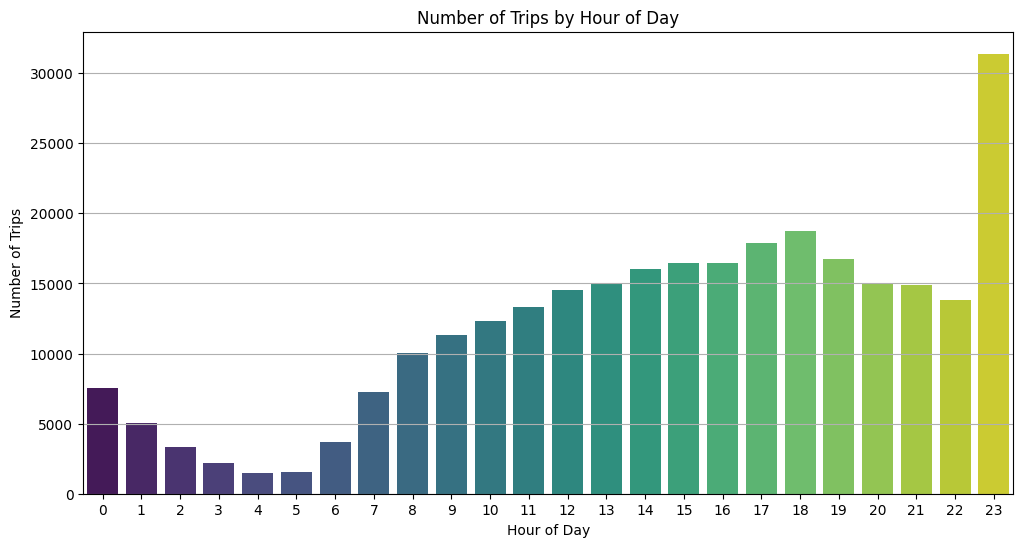

Busiest hour of the day: 23:00


In [132]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = merged['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

# Busiest hour
busiest_hour = trips_per_hour.idxmax()
print(f"Busiest hour of the day: {busiest_hour}:00")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [135]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.02  # for example, if you've used 2% of the full data

# Scale up the trip counts
trips_per_hour_scaled = trips_per_hour / sample_fraction
trips_per_hour_scaled
trips_per_hour_scaled.head(5)

pickup_hour
0    375400.0
1    254050.0
2    166050.0
3    109700.0
4     75150.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

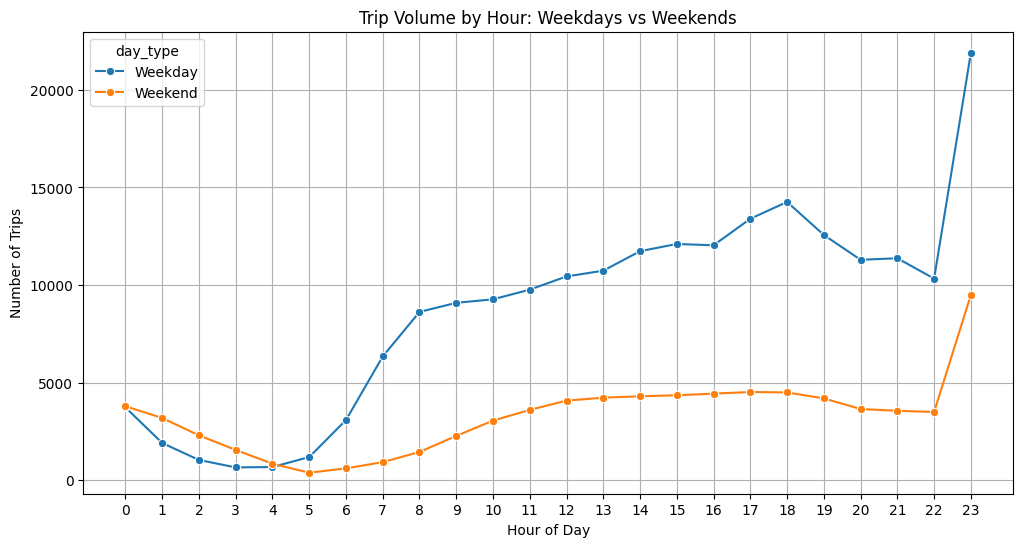

In [137]:
# Compare traffic trends for the week days and weekends
# Add a column for the day of week (0 = Monday, 6 = Sunday)
merged['day_of_week'] = merged['tpep_pickup_datetime'].dt.dayofweek

# Create a column for weekday/weekend
merged['day_type'] = merged['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day_type
hourly_trends = merged.groupby(['pickup_hour', 'day_type']).size().reset_index(name='num_trips')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='pickup_hour', y='num_trips', hue='day_type', marker='o')
plt.title("Trip Volume by Hour: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [140]:
# Find top 10 pickup and dropoff zones
#
top_pickup_zones = merged['zone'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_pickup_zones)


# Merge DOLocationID with zones to get dropoff zone names
dropoff_zones = merged.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')
dropoff_zones.rename(columns={'zone_y': 'drop_zone'}, inplace=True)

# Get top 10 dropoff zones
top_dropoff_zones = dropoff_zones['drop_zone'].value_counts().head(10)
print("Top 10 Dropoff Zones:")
print(top_dropoff_zones)


Top 10 Pickup Zones:
zone
JFK Airport                     15536
Midtown Center                  12973
Upper East Side South           12961
Upper East Side North           11459
LaGuardia Airport               10106
Midtown East                     9909
Times Sq/Theatre District        9801
Penn Station/Madison Sq West     9735
Lincoln Square East              9400
Murray Hill                      8211
Name: count, dtype: int64
Top 10 Dropoff Zones:
drop_zone
Upper East Side North        12231
Upper East Side South        11424
Midtown Center               10734
Times Sq/Theatre District     8471
Murray Hill                   8298
Midtown East                  7932
Lincoln Square East           7874
Upper West Side South         7830
Lenox Hill West               7413
East Chelsea                  7279
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [142]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged['zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

dropoff_merged = merged.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')
dropoff_counts = dropoff_merged['zone_y'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

zone_ratios = pickup_counts.merge(dropoff_counts, on='zone', how='outer').fillna(0)
zone_ratios['pickup_drop_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-5)

top10_ratios = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom10_ratios = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=True).head(10)

# Show top 10 pickup/dropoff ratio zones
print("Top 10 Pickup/Dropoff Ratio Zones:")
display(top10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])

# Show bottom 10 pickup/dropoff ratio zones
print("\nBottom 10 Pickup/Dropoff Ratio Zones:")
display(bottom10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']])

Top 10 Pickup/Dropoff Ratio Zones:


zone  pickup_count  dropoff_count  \
66                  East Elmhurst        1482.0            153   
119                   JFK Airport       15536.0           3217   
128             LaGuardia Airport       10106.0           3447   
175  Penn Station/Madison Sq West        9735.0           6307   
105       Greenwich Village South        4065.0           2778   
237                  West Village        6652.0           4641   
40                   Central Park        4642.0           3285   
152                  Midtown East        9909.0           7932   
95               Garment District        4661.0           3795   
151                Midtown Center       12973.0          10734   

     pickup_drop_ratio  
66            9.686274  
119           4.829344  
128           2.931825  
175           1.543523  
105           1.463283  
237           1.433312  
40            1.413090  
152           1.249244  
95            1.228195  
151           1.208590


Bottom 10 Pickup/Dropoff Ratio Zones:


zone  pickup_count  dropoff_count  \
172                           Pelham Bay           0.0             12   
194            Saint George/New Brighton           0.0              6   
192                    Rossville/Woodrow           0.0              3   
241                        Willets Point           0.0              5   
55                          Crotona Park           0.0              1   
173                      Pelham Bay Park           0.0              2   
24   Breezy Point/Fort Tilden/Riis Beach           0.0              4   
94                       Freshkills Park           0.0              1   
27                         Broad Channel           0.0              3   
54                          Country Club           0.0              9   

     pickup_drop_ratio  
172                0.0  
194                0.0  
192                0.0  
241                0.0  
55                 0.0  
173                0.0  
24                 0.0  
94                 0.0  
27                 0.0  
54                 0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [144]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_data = merged[(merged['pickup_hour'] >= 23) | (merged['pickup_hour'] <= 5)]

# Top 10 pickup zones during night
top_night_pickups = night_data['zone'].value_counts().head(10)

# Merge to get dropoff zone names
night_dropoff = night_data.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')
top_night_dropoffs = night_dropoff['zone_y'].value_counts().head(10)

# Display top 10 night pickup zones
print("Top 10 Pickup Zones During Night Hours (11 PM – 5 AM):")
display(top_night_pickups)

# Display top 10 night dropoff zones
print("\nTop 10 Dropoff Zones During Night Hours (11 PM – 5 AM):")
display(top_night_dropoffs)

Top 10 Pickup Zones During Night Hours (11 PM – 5 AM):


zone
JFK Airport                     3951
East Village                    3252
West Village                    2576
Clinton East                    2482
Times Sq/Theatre District       2308
LaGuardia Airport               1987
Lower East Side                 1863
Penn Station/Madison Sq West    1862
Greenwich Village South         1824
Midtown Center                  1540
Name: count, dtype: int64


Top 10 Dropoff Zones During Night Hours (11 PM – 5 AM):


zone_y
East Village             1860
Gramercy                 1442
Clinton East             1439
Yorkville West           1389
East Chelsea             1367
Murray Hill              1367
Lenox Hill West          1363
Upper East Side North    1114
Midtown South            1097
Upper West Side South    1083
Name: count, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [146]:
# Filter for night hours (11 PM to 5 AM)
night_data = merged[(merged['pickup_hour'] >= 23) | (merged['pickup_hour'] <= 5)]

# Display first few rows of night_data to verify
print("Sample of Trips During Night Hours (11 PM to 5 AM):")
display(night_data.head(4))

# Categorize each trip as Daytime z
df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['period'] = df['hour'].apply(lambda x: 'Daytime' if 6 <= x < 23 else 'Nighttime')

# Compute total revenue by period
revenue = df.groupby('period')['total_amount'].sum()
revenue_pct = (revenue / revenue.sum() * 100).round(1)

print(revenue_pct)


Sample of Trips During Night Hours (11 PM to 5 AM):


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   

   payment_type  ...  Shape_Area                  zone  LocationID    borough  \
0             1  ...    0.000070       Lower East Side       148.0  Manhattan   
1             0  ...    0.000167  TriBeCa/Civic Center       231.0  Manhattan   
2             1  ...    0.000072        Midtown Center       161.0  Manhattan   
3             0  ...    0.000116              Kips Bay       137.0  Manhattan   

                                            geometry  \
0  POLYGON ((988552.836 201677.665, 988387.669 20...   
1  POLYGON ((981667.364 203305, 981854.109 203130...   
2  POLYGON ((991081.026 214453.698, 990952.644 21...   
3  POLYGON ((991954.728 209026.462, 991949.076 20...   

                       route  duration_hours  avg_speed_mph  day_of_week  \
0       Lower East Side → 50        0.372500      10.711409            4   
1  TriBeCa/Civic Center → 61        0.385278      12.432588            4   
2       Midtown Center → 161        0.177222       5.924765            4   
3             Kips Bay → 144        0.229722       9.054414            4   

  day_type  
0  Weekday  
1  Weekday  
2  Weekday  
3  Weekday  

[4 rows x 34 columns]

period
Daytime      80.7
Nighttime    19.3
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [149]:
# Analyse the fare per mile per passenger for different passenger counts
# Compute fare per mile per passenger
merged['fare_per_mile_per_passenger'] = merged['fare_amount'] / (merged['trip_distance'] * merged['passenger_count'])

# Filter out infinite and NaN values
fare_analysis = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile_per_passenger'])

# Group by passenger count and compute average fare per mile per passenger
fare_by_passenger_count = fare_analysis.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display fare per mile per passenger grouped by passenger count
print("Average Fare per Mile per Passenger by Passenger Count:")
display(fare_by_passenger_count)

Average Fare per Mile per Passenger by Passenger Count:


passenger_count  fare_per_mile_per_passenger
0              1.0                    11.566344
1              2.0                     5.940328
2              3.0                     4.184696
3              4.0                     4.903184
4              5.0                     1.541750
5              6.0                     1.258462
6              8.0                     0.350442
7              9.0                     0.595593

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [151]:
# Compare the average fare per mile for different days and for different times of the day
# Compute fare per mile
merged['fare_per_mile'] = merged['fare_amount'] / merged['trip_distance']

# Drop rows with inf or NaN
fare_cleaned = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Extract day of week and hour of day
fare_cleaned['day_of_week'] = fare_cleaned['tpep_pickup_datetime'].dt.day_name()
fare_cleaned['hour'] = fare_cleaned['tpep_pickup_datetime'].dt.hour

# Group by day of week
avg_fare_by_day = fare_cleaned.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Group by hour of day
avg_fare_by_hour = fare_cleaned.groupby('hour')['fare_per_mile'].mean().reset_index()

# Display average fare per mile by day of the week
print("Average Fare per Mile by Day of the Week:")
display(avg_fare_by_day)

# Display average fare per mile by hour of the day
print("\nAverage Fare per Mile by Hour of the Day:")
display(avg_fare_by_hour)

Average Fare per Mile by Day of the Week:


day_of_week  fare_per_mile
0      Friday       9.776352
1      Monday      10.072095
2    Saturday      10.720502
3      Sunday      17.835669
4    Thursday      12.309219
5     Tuesday      10.647779
6   Wednesday      11.110592


Average Fare per Mile by Hour of the Day:


hour  fare_per_mile
0      0      11.812586
1      1      15.391946
2      2       8.961388
3      3      10.243719
4      4      17.712970
5      5      10.573147
6      6      12.773038
7      7       8.658091
8      8       9.908401
9      9      10.433962
10    10      10.550632
11    11      10.988241
12    12      11.546295
13    13      12.822365
14    14      12.370858
15    15      11.177400
16    16      13.292235
17    17      11.710089
18    18      10.326420
19    19      11.670851
20    20       9.670017
21    21       8.876111
22    22      11.834833
23    23      15.221915

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [153]:
# Compare fare per mile for different vendors
# Compute fare per mile
merged['fare_per_mile'] = merged['fare_amount'] / merged['trip_distance']

# Remove invalid entries
vendor_fares = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Group by vendor and compute average fare per mile
fare_by_vendor = vendor_fares.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Display average fare per mile by vendor
print("Average Fare per Mile by Vendor:")
display(fare_by_vendor)


Average Fare per Mile by Vendor:


VendorID  fare_per_mile
0         1       7.915511
1         2      13.009761
2         6       5.050381

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [172]:
# Make sure trip_distance is numeric
merged['trip_distance'] = pd.to_numeric(merged['trip_distance'], errors='coerce')

# Create distance tier column
bins = [0, 2, 5, np.inf]
labels = ['0–2 miles', '2–5 miles', '5+ miles']
merged['distance_tier'] = pd.cut(
    merged['trip_distance'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [175]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Compute tip percentage
merged['tip_percent'] = (merged['tip_amount'] / merged['fare_amount']) * 100

# Drop invalid or infinite tip percentages
tip_data = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['tip_percent'])

# Group by distance tier
tip_by_distance = tip_data.groupby('distance_tier')['tip_percent'].mean().reset_index()

# Group by passenger count
tip_by_passenger = tip_data.groupby('passenger_count')['tip_percent'].mean().reset_index()

# Group by pickup hour
tip_data['pickup_hour'] = tip_data['tpep_pickup_datetime'].dt.hour
tip_by_hour = tip_data.groupby('pickup_hour')['tip_percent'].mean().reset_index()

# Display tip percentage by distance tier
print("Average Tip Percentage by Distance Tier:")
display(tip_by_distance)

# Display tip percentage by passenger count
print("\nAverage Tip Percentage by Passenger Count:")
display(tip_by_passenger)

# Display tip percentage by pickup hour
print("\nAverage Tip Percentage by Pickup Hour:")
display(tip_by_hour)

Average Tip Percentage by Distance Tier:


distance_tier  tip_percent
0     0–2 miles    22.125980
1     2–5 miles    18.598054
2      5+ miles    16.490589


Average Tip Percentage by Passenger Count:


passenger_count  tip_percent
0              0.0    20.730346
1              1.0    20.659950
2              2.0    19.770977
3              3.0    18.898536
4              4.0    17.444324
5              5.0    20.587463
6              6.0    20.848343
7              7.0     0.013333
8              8.0     8.531274
9              9.0    20.000000


Average Tip Percentage by Pickup Hour:


pickup_hour  tip_percent
0             0    20.221120
1             1    21.026771
2             2    19.678271
3             3    19.791648
4             4    17.348841
5             5    16.702499
6             6    18.597800
7             7    19.056066
8             8    19.638872
9             9    19.371849
10           10    19.186286
11           11    18.932379
12           12    19.106681
13           13    19.148022
14           14    19.215835
15           15    18.628023
16           16    20.950114
17           17    21.258114
18           18    21.847054
19           19    21.838769
20           20    21.026649
21           21    21.247480
22           22    21.314371
23           23    19.758401

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [177]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter trips with tip percentage < 10%
low_tip = tip_data[tip_data['tip_percent'] < 10]

# Filter trips with tip percentage > 25%
high_tip = tip_data[tip_data['tip_percent'] > 25]

# Compare average fare, trip distance, and passenger count
low_tip_stats = low_tip[['fare_amount', 'trip_distance', 'passenger_count']].mean()
high_tip_stats = high_tip[['fare_amount', 'trip_distance', 'passenger_count']].mean()

# Display average stats for low-tip trips (< 10%)
print("Average Stats for Trips with Tip Percentage < 10%:")
display(low_tip_stats)

# Display average stats for high-tip trips (> 25%)
print("\nAverage Stats for Trips with Tip Percentage > 25%:")
display(high_tip_stats)

Average Stats for Trips with Tip Percentage < 10%:


fare_amount        21.974054
trip_distance       4.146528
passenger_count     1.399650
dtype: float64


Average Stats for Trips with Tip Percentage > 25%:


fare_amount        14.493859
trip_distance       2.400158
passenger_count     1.348798
dtype: float64

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [179]:
# See how passenger count varies across hours and days

# Extract hour and day from pickup datetime
merged['pickup_hour'] = merged['tpep_pickup_datetime'].dt.hour
merged['pickup_day'] = merged['tpep_pickup_datetime'].dt.day_name()

# Group by hour and calculate average passenger count
passenger_by_hour = merged.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by day and calculate average passenger count
passenger_by_day = merged.groupby('pickup_day')['passenger_count'].mean().reset_index()

# Display average passenger count by hour
print("Average Passenger Count by Hour of the Day:")
display(passenger_by_hour)

# Display average passenger count by day of the week
print("\nAverage Passenger Count by Day of the Week:")
display(passenger_by_day)

Average Passenger Count by Hour of the Day:


pickup_hour  passenger_count
0             0         1.394531
1             1         1.445756
2             2         1.413278
3             3         1.416301
4             4         1.340520
5             5         1.288295
6             6         1.229746
7             7         1.256894
8             8         1.282220
9             9         1.304019
10           10         1.338975
11           11         1.338722
12           12         1.351596
13           13         1.351142
14           14         1.380258
15           15         1.394077
16           16         1.388844
17           17         1.366603
18           18         1.362777
19           19         1.377579
20           20         1.385097
21           21         1.402463
22           22         1.427854
23           23         1.411319


Average Passenger Count by Day of the Week:


pickup_day  passenger_count
0     Friday         1.395057
1     Monday         1.340680
2   Saturday         1.459343
3     Sunday         1.444990
4   Thursday         1.320718
5    Tuesday         1.321329
6  Wednesday         1.318036

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [181]:
# How does passenger count vary across zones

# Group by pickup zone and calculate average passenger count
passenger_by_zone = merged.groupby('zone')['passenger_count'].mean().reset_index()

# Display average passenger count by zone
print("Average Passenger Count by Pickup Zone:")
display(passenger_by_zone)

Average Passenger Count by Pickup Zone:


zone  passenger_count
0    Allerton/Pelham Gardens         1.111111
1              Alphabet City         1.308244
2              Arden Heights         1.000000
3    Arrochar/Fort Wadsworth         2.000000
4                    Astoria         1.173913
..                       ...              ...
233       Woodlawn/Wakefield         1.000000
234                 Woodside         1.291667
235       World Trade Center         1.516552
236           Yorkville East         1.289593
237           Yorkville West         1.319149

[238 rows x 2 columns]

In [182]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate average passenger count per zone
avg_passenger_per_zone = merged.groupby('zone')['passenger_count'].mean().reset_index()

# Merge with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_per_zone, on='zone', how='left')
zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Display zones with average passenger count
print("Zones with Average Passenger Count:")
display(zones_with_trips[['zone', 'borough', 'avg_passenger_count']].head())


Zones with Average Passenger Count:


zone        borough  avg_passenger_count
0           Newark Airport            EWR             1.638889
1              Jamaica Bay         Queens                  NaN
2  Allerton/Pelham Gardens          Bronx             1.111111
3            Alphabet City      Manhattan             1.308244
4            Arden Heights  Staten Island             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [185]:
# How often is each surcharge applied?
# Count how many times each surcharge type is applied
surcharge_counts = merged[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']].gt(0).sum()
surcharge_counts = surcharge_counts.reset_index()
surcharge_counts.columns = ['surcharge_type', 'count']

# Display count of each surcharge applied
print("Surcharge Application Frequency:")
display(surcharge_counts)


Surcharge Application Frequency:


surcharge_type   count
0                  extra  178250
1                mta_tax  283346
2  improvement_surcharge  285865
3   congestion_surcharge  254474
4            airport_fee    1999

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#### - Align cab dispatching with peak activity windows, especially during weekday commute hours and weekend late nights.
#### - Identify and avoid time-based slow routes by leveraging trip speed trends—congested corridors like Midtown in the evenings should be deprioritized.
#### - Deploy predictive dispatching using historical speed and demand data to proactively reduce idle time.
#### - Focus night shift resources (11 PM – 5 AM) on zones with high activity such as nightlife districts.
#### - Improve routing efficiency by chaining trips—assigning drivers to nearby high-demand pickup zones after dropoffs.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#### - Prioritize zones with consistent high pickup demand like Midtown, JFK, and Penn Station during known peak times.
#### - Reallocate idle cabs from zones with high dropoff but low pickup ratios to prevent supply imbalance.
#### - Tailor weekend cab distribution to areas with strong late-night demand such as entertainment hubs and residential neighborhoods.
#### - Use scheduled event data (e.g., concerts, games) to pre-position cabs near venues ahead of time.
#### - Maintain strategic airport presence during high-flight activity periods to capture premium long-distance trips.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

#### - Apply time- and zone-based fare modifiers during periods of high congestion and demand to optimize revenue.
#### - Introduce adaptive pricing that reflects trip conditions—slow-moving or idle-heavy routes may include slight surcharges.
#### - Offer off-peak fare incentives to attract passengers and smooth out demand across the day.
#### - Compete not just on base fare but on service quality, transparency, and features like tip recommendations or ride feedback.
#### - Analyze tipping behavior to guide dynamic fare adjustments, especially in zones where customer generosity remains high.